In [1]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing.preprocessor import Preprocess     #  From usatellite
from models.unet2d.unet2d_model import Unet2d         #  From usatellite
from plot_utils.plotting_utils import SatPlotter      #  From usatellite
from data_utils.dataset import TrainingUtils          #  From usatellite
from loss.loss_metrics import f1
from loss.loss_metrics import categorical_focal_loss
from loss.loss_metrics import weighted_categorical_crossentropy

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

#TEMP
import tensorflow as tf

In [2]:
aug_imgs = np.load(r'C:\\Users\\Cody\\Documents\\usatellite_data\\aug_imgs.npy')
aug_labels = np.load(r'C:\\Users\\Cody\\Documents\\usatellite_data\\aug_labels.npy')

img_array = np.load(r'C:\\Users\\Cody\\Documents\\usatellite_data\\img_array.npy')
label_array = np.load(r'C:\\Users\\Cody\\Documents\\usatellite_data\\label_array.npy')
img_array = img_array.astype(np.float32)
label_array = label_array.astype(np.float32)

In [3]:
preproc = Preprocess()

In [4]:
imgs_array_scaled = preproc.unit_normalize_dims(aug_imgs)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(imgs_array_scaled, aug_labels, test_size=0.30, shuffle=True, random_state=42)

In [6]:
train_utils = TrainingUtils()

In [7]:
weights = train_utils.calc_weights(aug_labels)

In [8]:
weights

array([1.03302943, 1.03408826, 1.04285114, 1.03976285, 1.73028211,
       2.        ])

In [9]:
unet2dmodel = Unet2d(input_img=imgs_array_scaled)

In [10]:
unet = unet2dmodel.get_unet()

In [11]:
unet.compile(optimizer=Adam(), loss=weighted_categorical_crossentropy(weights), metrics=["categorical_accuracy", f1])

In [12]:
results = unet.fit(x_train, y_train, batch_size=4, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
44/44 [==============================] - 591s 13s/step - loss: 1.3340 - categorical_accuracy: 0.5163 - f1: 0.3729 - val_loss: 16.1623 - val_categorical_accuracy: 0.0133 - val_f1: 0.0125
Epoch 2/100
44/44 [==============================] - 586s 13s/step - loss: 1.0095 - categorical_accuracy: 0.6316 - f1: 0.5835 - val_loss: 10.3212 - val_categorical_accuracy: 0.2006 - val_f1: 0.1870
Epoch 3/100
44/44 [==============================] - 586s 13s/step - loss: 0.9484 - categorical_accuracy: 0.6394 - f1: 0.6014 - val_loss: 9.4455 - val_categorical_accuracy: 0.1190 - val_f1: 0.0954
Epoch 4/100
44/44 [==============================] - 585s 13s/step - loss: 0.9116 - categorical_accuracy: 0.6576 - f1: 0.6203 - val_loss: 1.3081 - val_categorical_accuracy: 0.5545 - val_f1: 0.5370
Epoch 5/100
44/44 [==============================] - 585s 13s/step - loss: 0.8753 - categorical_accuracy: 0.6673 - f1: 0.6359 - val_loss: 1.2829 - val_categorical_accuracy: 0.5751 - val_f1: 0.5514
Epoch 6/100
4

44/44 [==============================] - 587s 13s/step - loss: 0.4137 - categorical_accuracy: 0.8413 - f1: 0.8365 - val_loss: 0.4657 - val_categorical_accuracy: 0.8179 - val_f1: 0.8137
Epoch 43/100
44/44 [==============================] - 584s 13s/step - loss: 0.3949 - categorical_accuracy: 0.8474 - f1: 0.8439 - val_loss: 0.4811 - val_categorical_accuracy: 0.8118 - val_f1: 0.8086
Epoch 44/100
44/44 [==============================] - 584s 13s/step - loss: 0.3859 - categorical_accuracy: 0.8522 - f1: 0.8473 - val_loss: 0.4635 - val_categorical_accuracy: 0.8206 - val_f1: 0.8112
Epoch 45/100
44/44 [==============================] - 584s 13s/step - loss: 0.3774 - categorical_accuracy: 0.8506 - f1: 0.8497 - val_loss: 0.4955 - val_categorical_accuracy: 0.8102 - val_f1: 0.7978
Epoch 46/100
44/44 [==============================] - 585s 13s/step - loss: 0.3734 - categorical_accuracy: 0.8545 - f1: 0.8519 - val_loss: 0.4993 - val_categorical_accuracy: 0.8142 - val_f1: 0.7982
Epoch 47/100
44/44 [===

44/44 [==============================] - 585s 13s/step - loss: 0.2445 - categorical_accuracy: 0.9042 - f1: 0.8989 - val_loss: 0.4135 - val_categorical_accuracy: 0.8497 - val_f1: 0.8413
Epoch 84/100
44/44 [==============================] - 584s 13s/step - loss: 0.2378 - categorical_accuracy: 0.9045 - f1: 0.9016 - val_loss: 0.4012 - val_categorical_accuracy: 0.8557 - val_f1: 0.8480
Epoch 85/100
44/44 [==============================] - 584s 13s/step - loss: 0.2362 - categorical_accuracy: 0.9034 - f1: 0.9022 - val_loss: 0.3870 - val_categorical_accuracy: 0.8526 - val_f1: 0.8553
Epoch 86/100
44/44 [==============================] - 585s 13s/step - loss: 0.2365 - categorical_accuracy: 0.9060 - f1: 0.9022 - val_loss: 0.4259 - val_categorical_accuracy: 0.8559 - val_f1: 0.8453
Epoch 87/100
44/44 [==============================] - 585s 13s/step - loss: 0.2256 - categorical_accuracy: 0.9091 - f1: 0.9055 - val_loss: 0.3875 - val_categorical_accuracy: 0.8606 - val_f1: 0.8520
Epoch 88/100
44/44 [===

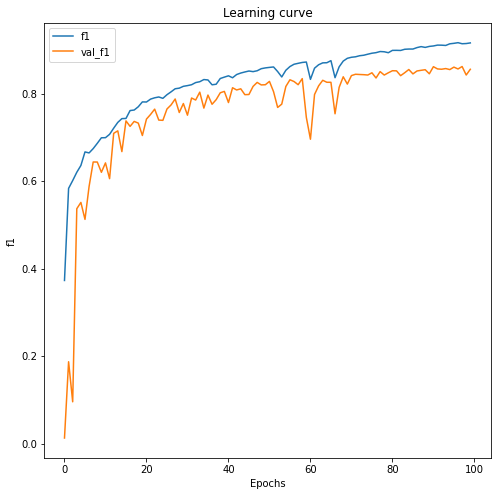

In [13]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["f1"], label="f1")
plt.plot(results.history["val_f1"], label="val_f1")
#plt.plot( np.argmin(results.history["val_f1"]), np.min(results.history["val_f1"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("f1")
plt.legend();

In [14]:
test_imgs = unet.predict(x_val)

In [15]:
test_classes = np.argmax(test_imgs, -1)

In [16]:
satplot = SatPlotter()

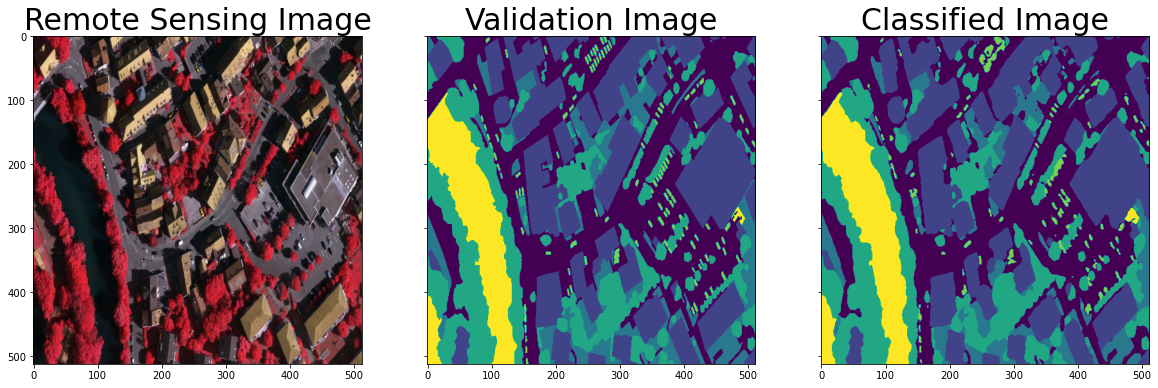

In [60]:
satplot.plot_image_and_result(x_val, y_val, test_classes)

In [22]:
unet.save_weights(r'C:\\Users\\Cody\\Documents\\usatellite_data\\unet_weighted_crossentropy_weights.h5')